In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
raw_data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [3]:
raw_data.dropna(axis=0, inplace=True)

In [4]:
raw_data.loc[:, 'gender'] = raw_data['gender'].astype('category')

In [5]:
data = pd.get_dummies(raw_data,prefix=['gender'])

In [6]:
data.head(5)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


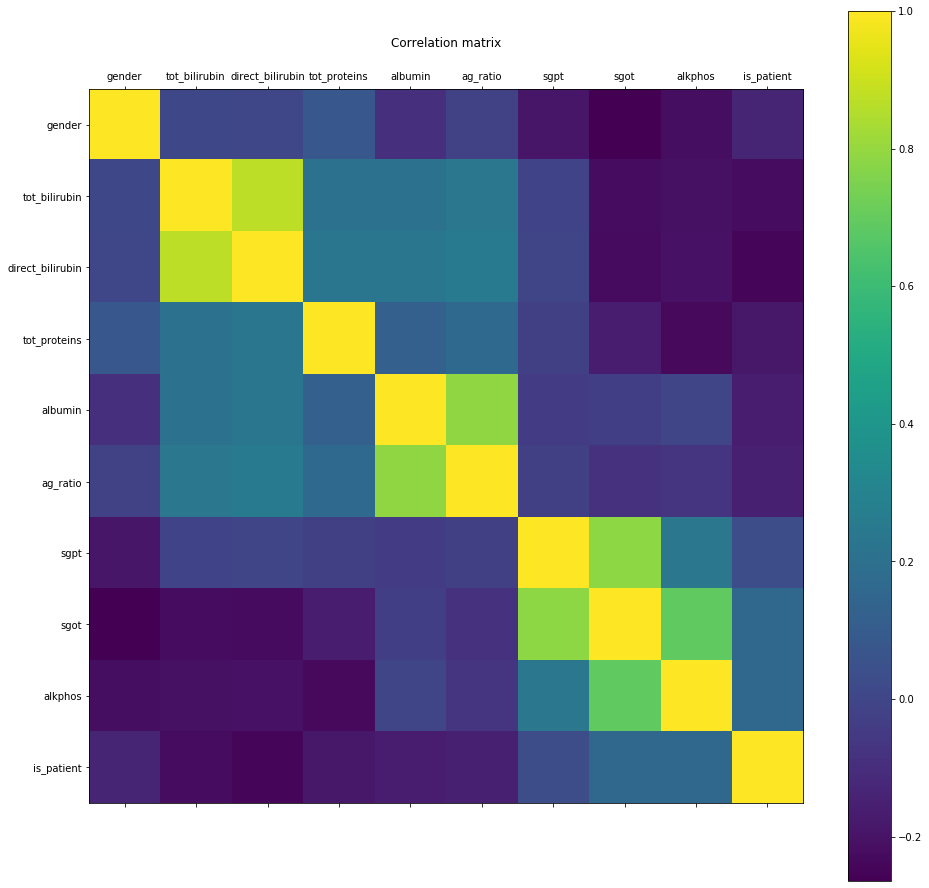

In [7]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(16,16))
cax = ax.matshow(raw_data.corr())
ax.set_xticklabels(raw_data.columns)
ax.set_yticklabels(raw_data.columns)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.set_title('Correlation matrix')
fig.colorbar(cax)
plt.show()

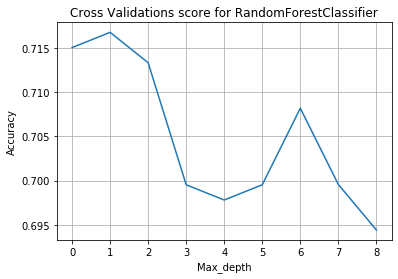

In [8]:
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X,y = (data.drop('is_patient', axis=1), data['is_patient'])
hist = []
for i in range(1,10):
    clf = RandomForestClassifier(n_estimators=200, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

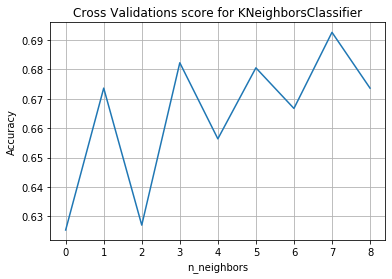

In [9]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np

X_normalized = preprocessing.normalize(X, norm='max')
hist = []
for i in range(1,10):
    clf = clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X_normalized, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

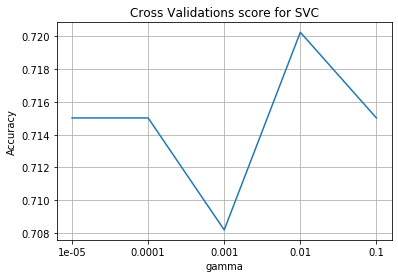

In [10]:
from sklearn.svm import SVC
grid = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X,y,validation_split=0.2, epochs=32)
model.evaluate(X,y)

Using TensorFlow backend.


Train on 463 samples, validate on 116 samples
Epoch 1/32
463/463 [==============================] - 3s 7ms/step - loss: 0.6850 - accuracy: 0.3326 - val_loss: 0.8227 - val_accuracy: 0.3190
Epoch 2/32
463/463 [==============================] - 0s 106us/step - loss: 0.1578 - accuracy: 0.5724 - val_loss: 0.5939 - val_accuracy: 0.5776
Epoch 3/32
463/463 [==============================] - 0s 160us/step - loss: -0.2189 - accuracy: 0.6695 - val_loss: 0.5119 - val_accuracy: 0.7328
Epoch 4/32
463/463 [==============================] - 0s 121us/step - loss: -0.5643 - accuracy: 0.7019 - val_loss: 0.4190 - val_accuracy: 0.7328
Epoch 5/32
463/463 [==============================] - 0s 140us/step - loss: -0.8094 - accuracy: 0.7041 - val_loss: 0.2775 - val_accuracy: 0.7414
Epoch 6/32
463/463 [==============================] - 0s 110us/step - loss: -1.1029 - accuracy: 0.7084 - val_loss: 0.0869 - val_accuracy: 0.7414
Epoch 7/32
463/463 [==============================] - 0s 114us/step - loss: -1.3744 - ac

[-57.30666144441858, 0.7150259017944336]

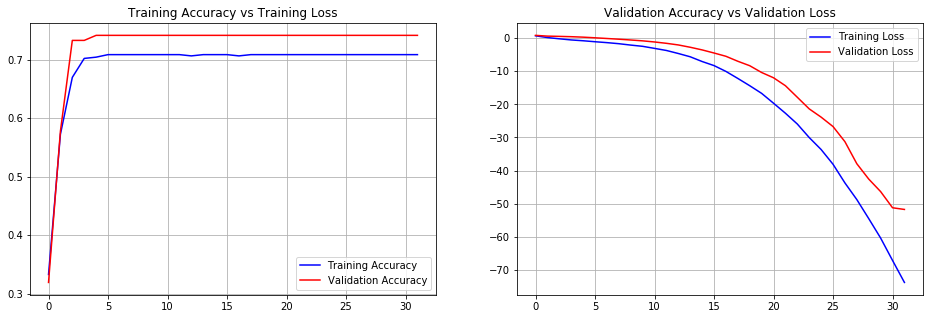

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig, ax_l = plt.subplots(1,2, figsize=(16,5))
ax_l[0].plot(acc, 'b',label='Training Accuracy')
ax_l[0].plot(val_acc, 'r',label='Validation Accuracy')
ax_l[0].set_title('Training Accuracy vs Training Loss')
ax_l[0].legend()
ax_l[0].grid()
ax_l[1].plot(loss, 'b',label='Training Loss')
ax_l[1].plot(val_loss, 'r',label='Validation Loss')
ax_l[1].set_title('Validation Accuracy vs Validation Loss')
ax_l[1].legend()
ax_l[1].grid()

In [19]:
print("Happy Machine Learning")

Happy Machine Learning
